<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/DeepLearning/MNIST/Keras_220921_MNIST_%EC%8B%A4%EC%8A%B502_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ln -s /content/drive/MyDrive /mydrive

In [4]:
%cd /mydrive

/content/drive/MyDrive


In [5]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


## __CNN Layer & Batch Size 키우기__
---
SGD, adam, rmsprop 각 optimizer별 batch_size를 변경해볼 것

### **1. Library Import**

In [6]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **2. 데이터 확인 및 전처리**

In [8]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [9]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [11]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __Batchsize 변경__

---
64 -> 124로 조정

#### __1. batch_size=128, 출력 직전층 activation='relu', optimizer='SGD'__ 

In [12]:
import keras

In [13]:
model_1 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [14]:
model_1.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try02.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1 = model_1.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
368/375 [============================>.] - ETA: 0s - loss: 2.0882 - accuracy: 0.2668
Epoch 1: val_accuracy improved from -inf to 0.75892, saving model to mnist/try02.h5
375/375 [==============================] - 16s 12ms/step - loss: 2.0747 - accuracy: 0.2719 - val_loss: 1.0642 - val_accuracy: 0.7589
Epoch 2/100
372/375 [============================>.] - ETA: 0s - loss: 0.8675 - accuracy: 0.7115
Epoch 2: val_accuracy improved from 0.75892 to 0.88067, saving model to mnist/try02.h5
375/375 [==============================] - 2s 6ms/step - loss: 0.8657 - accuracy: 0.7124 - val_loss: 0.4153 - val_accuracy: 0.8807
Epoch 3/100
368/375 [============================>.] - ETA: 0s - loss: 0.5470 - accuracy: 0.8216
Epoch 3: val_accuracy improved from 0.88067 to 0.91500, saving model to mnist/try02.h5
375/375 [==============================] - 2s 6ms/step - loss: 0.5462 - accuracy: 0.8222 - val_loss: 0.2932 - val_accuracy: 0.9150
Epoch 4/100
372/375 [============================>.] - E

In [16]:
result = model_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9910

테스트 정확도: 0.9910


In [17]:
loaded_model = load_model('mnist/try02.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9910

불러온 모델 테스트 정확도: 0.9910


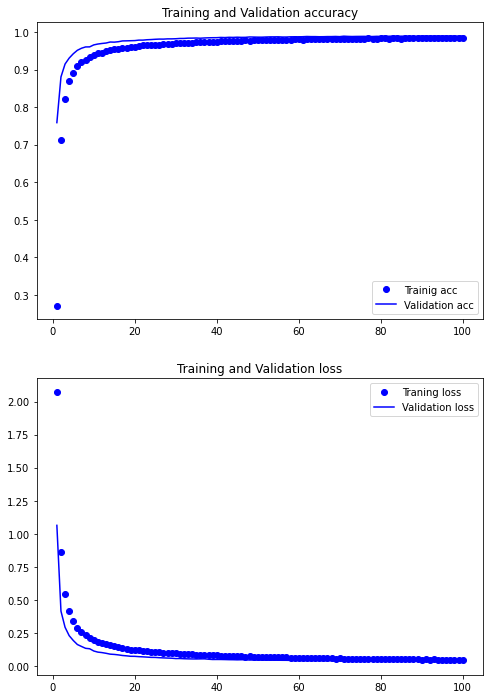

In [18]:
acc = hist_1.history['accuracy']
val_acc = hist_1.history['val_accuracy']
loss = hist_1.history['loss']
val_loss = hist_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [19]:
df = pd.DataFrame([['CNN', 'model_1', '32(relu/drop0.2)-64(relu/drop0.2)-128(relu/drop0.5)-Flatten-64(sigmoid)-10(softmax)]', 'SGD', 100, 128, 0.2, 'es/mc', 
                    "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]],
                  columns=['모델', 'Name', 'Structure', 'Optimizer', 'epochs', 'batch_size', 'validation_split', 'callback', 'Accuracy', 'MC_Accuracy', 'Loss', 'MC_Loss'])